## Importing Libraries

In [1]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display

%matplotlib inline

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import cv2

## Importing the Data


In [179]:
#import data
df = pd.read_csv("augmented_data.csv")
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5226 non-null   int64  
 1   index       5226 non-null   int64  
 2   image_path  5226 non-null   object 
 3   steering    5226 non-null   float64
 4   throttle    5226 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 204.3+ KB


In [180]:
length = df["index"][-1::]
split = int(length/100*80) #80% for training 20% for testing
print(split)


4180


In [181]:
#shuffling the set before we split it
df_shuffled = df.sample(frac=1)

In [182]:
#print header to see if it shuffled
df_shuffled.head()

,Unnamed: 0,index,image_path,steering,throttle
4618,4618,4618,learning_images//4618.jpeg,0.018868,1.0
808,808,808,learning_images//808.jpeg,-0.037736,1.0
2411,2411,2411,learning_images//2411.jpeg,0.009434,1.0
4297,4297,4297,learning_images//4297.jpeg,0.028302,1.0
1930,1930,1930,learning_images//1930.jpeg,0.000000,1.0


In [183]:
#placeholders, ram intensive - might crash on lower end machines
x_train = np.full((split,160,320,3),0)
x_test = np.full((int(length-split+1),160,320,3),0)

In [184]:
#split in training and testing data
#x holds the image
#y holds the steering input
train = df_shuffled.iloc[:split,:]
test = df_shuffled.iloc[split:,:]

#training data
x_train_path = train["image_path"]
y_train = train["steering"]

#testing data
x_test_path = test["image_path"]
y_test = test["steering"]

#import all images from paths, might be ram intensive 16gb or more might be required
index = 0
for path in x_train_path:
    x_train[index] = cv2.imread(path)
    index = index + 1

    
#for test set as well
index = 0
for path in x_test_path:
    x_test[index] = cv2.imread(path)
    index = index + 1




In [185]:
#reset indexes
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [186]:
#checking outputs
print(x_train[0])
print(y_train.iloc[0])

[[[207 162 129]
  [209 164 131]
  [207 162 129]
  ...
  [215 174 142]
  [132  93  61]
  [201 162 130]]

 [[218 173 140]
  [215 170 137]
  [210 165 132]
  ...
  [172 131  99]
  [214 175 143]
  [205 166 134]]

 [[197 152 119]
  [199 154 121]
  [207 162 129]
  ...
  [221 180 148]
  [200 161 129]
  [206 167 135]]

 ...

 [[109 123 135]
  [107 121 133]
  [103 117 129]
  ...
  [102 113 127]
  [109 118 132]
  [113 122 136]]

 [[107 122 131]
  [ 93 108 117]
  [ 82  97 106]
  ...
  [112 123 137]
  [112 121 135]
  [115 124 138]]

 [[ 84  99 108]
  [ 81  96 105]
  [ 85 100 109]
  ...
  [150 161 175]
  [123 132 146]
  [102 111 125]]]
0.01886792


In [187]:
#check if y has been extracted properly
y_train

0       0.018868
1      -0.037736
2       0.009434
3       0.028302
4       0.000000
          ...   
4175    0.066038
4176    0.867924
4177   -1.000000
4178   -1.000000
4179   -0.179245
Name: steering, Length: 4180, dtype: float64

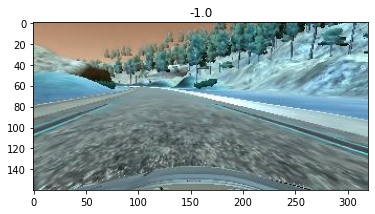

In [188]:
#checking if it seems like the right input for that frame
#show an example image
plt.imshow(x_train[49])
plt.title(y_train[49])
plt.show()



KeyError: 'steering'

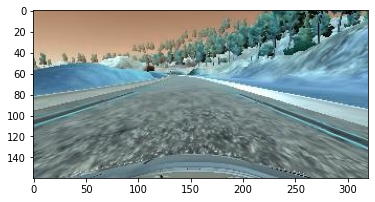

In [167]:
#show many examples
for i in range(50):
    plt.imshow(x_train[i])
    plt.title(y_train["steering"][i])
    plt.show()

In [189]:
#test
len(y_train)

4180

## Preprocessing of the images

In [190]:
#goal shape of image, and other parameters
gausblur = 3
height = 60
width = 200

In [191]:
#create function that cuts and resizes the image
#this way we only see the relevant information
def resize(image):    
    image = image[60:130,:,:]    #crops image
    image = np.float32(image)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
    image = cv2.GaussianBlur(image,(gausblur,gausblur),0)
    image = cv2.resize(image,(width,height))
    image = image/255
    
    return image

In [192]:
def random_flip(image,steering_angle):
     if np.random.rand() < 0:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle
     return image, steering_angle

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


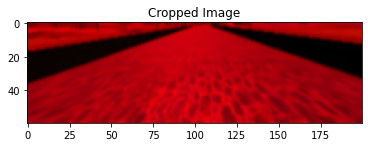

In [193]:
#print test image
plt.imshow(resize(x_train[0]))
plt.title("Cropped Image")
plt.show()

In [194]:
#create new arrays that have the right dimensions
x_train_processed = np.float32(np.full((split,height,width,3),0))
x_test_processed = np.float32(np.full((int(length-split+1),height,width,3),0))

In [195]:
#check sizes
x_train_processed[0][1]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [196]:
y_train.iloc[0]

0.01886792

In [197]:
#first for training set
for index in range(len(x_train)):
    x_train_processed[index] = resize(x_train[index])
    x_train_processed[index],y_train[index] = random_flip(x_train_processed[index],y_train[index])

#for testing set
for index in range(len(x_test)):
    x_test_processed[index] = resize(x_test[index])
    x_test_processed[index],y_test[index] = random_flip(x_test_processed[index],y_test[index])
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


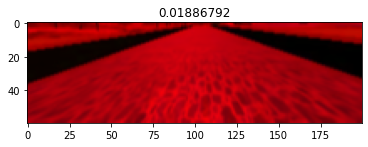

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


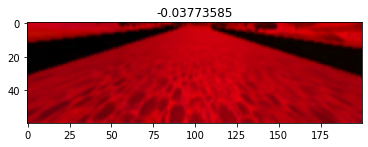

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


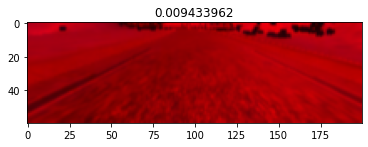

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


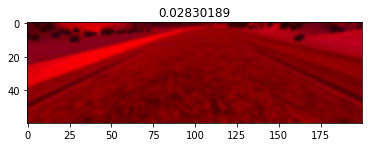

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


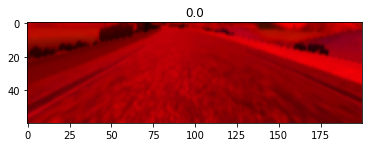

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


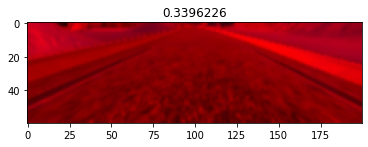

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


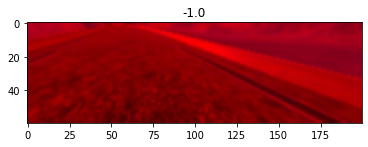

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


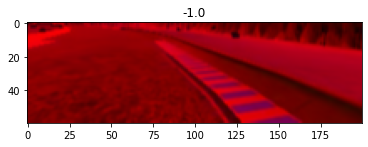

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


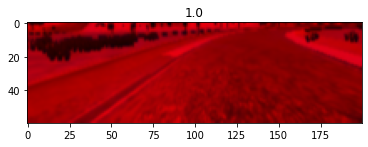

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


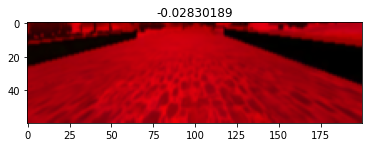

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


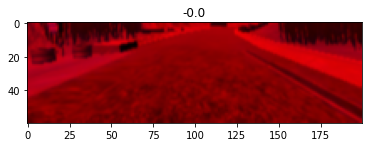

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


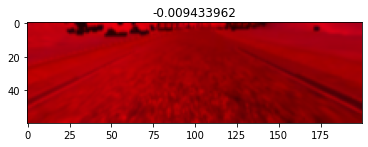

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


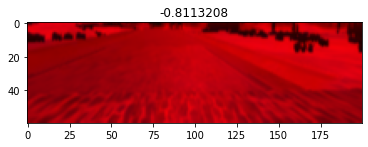

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


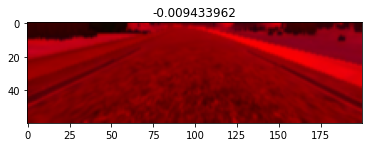

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


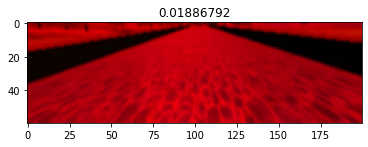

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


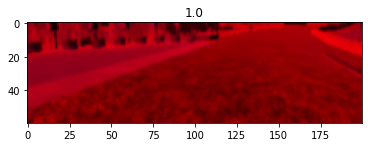

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


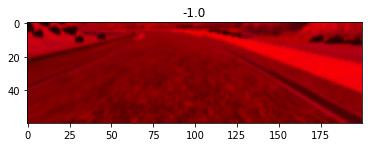

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


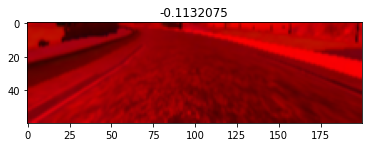

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


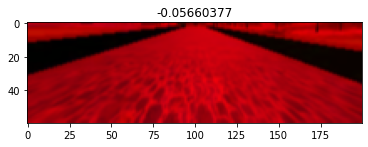

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


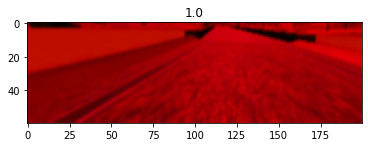

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


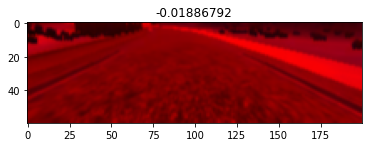

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


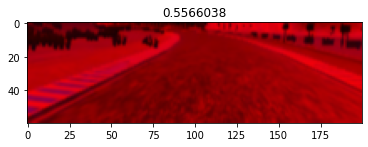

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


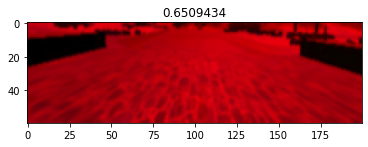

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


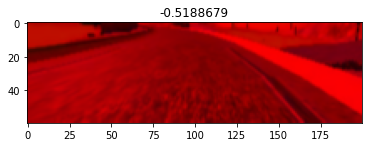

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


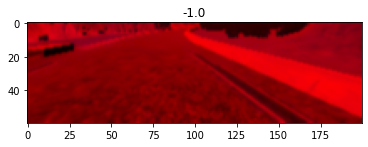

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


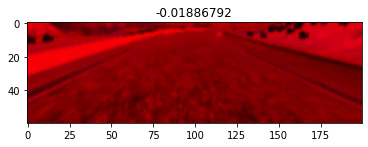

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


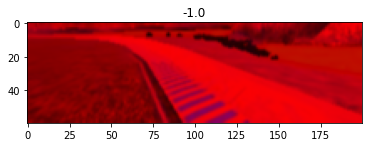

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


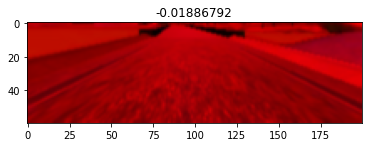

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


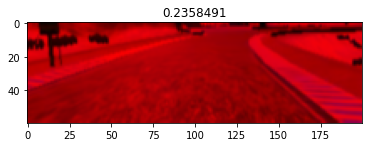

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


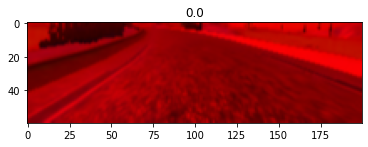

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


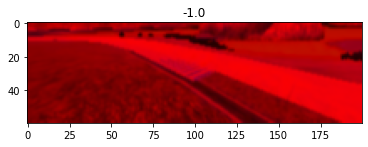

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


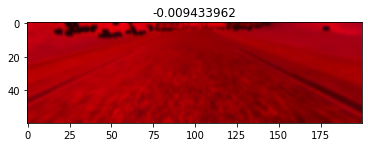

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


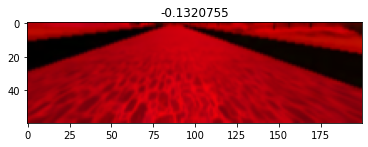

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


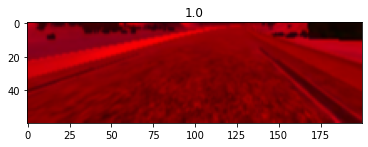

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


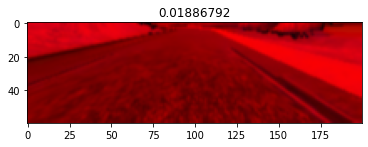

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


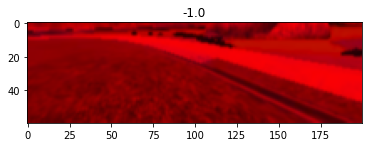

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


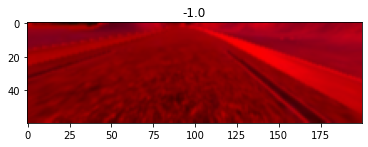

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


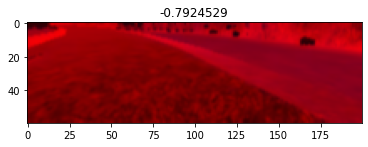

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


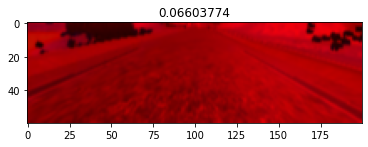

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


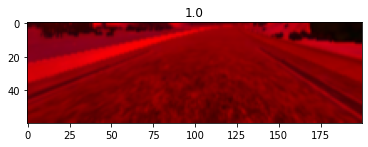

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


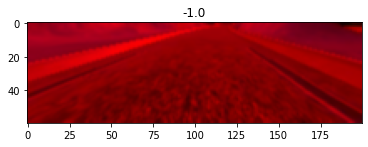

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


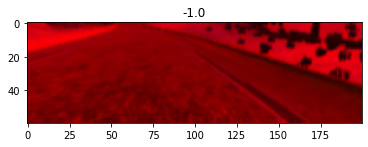

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


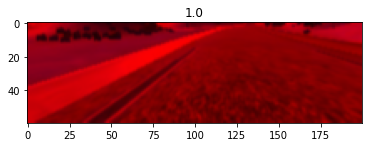

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


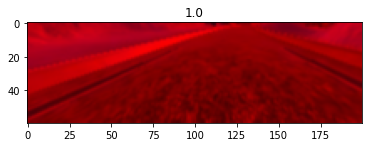

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


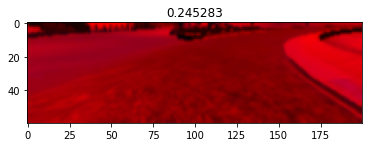

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


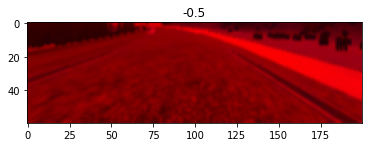

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


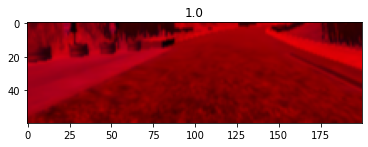

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


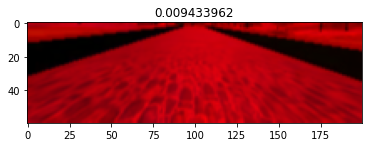

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


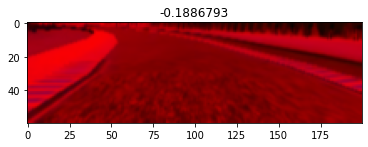

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


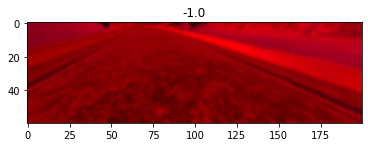

In [198]:
#show many examples
for i in range(50):
    plt.imshow(x_train_processed[i])
    plt.title(y_train.iloc[i])
    plt.show()

## Creating The Model

#### now that we have prepared the data for learning, we start building the model

In [20]:
#import more libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras import models
from keras.models import load_model

In [21]:
#parameters for learning
learningRate = 0.0001
inputShape = 60
a=60
b=200
c=3
inputShape = a,b,c

In [22]:
#model that seems to work well with self driving carss

model = Sequential()
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=inputShape))
model.add(Conv2D(24, (5, 5), activation='elu', strides=(2, 2)))
model.add(Conv2D(36, (5, 5), activation='elu', strides=(2, 2)))
model.add(Conv2D(48, (5, 5), activation='elu', strides=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='elu',padding="same"))
model.add(Conv2D(64, 3, 3, activation='elu',padding="same"))
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate = learningRate),loss='mse')
model.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 60, 200, 3)        0         
                                                                 
 conv2d (Conv2D)             (None, 28, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 8, 64)          27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 3, 64)          36928     
                                                                 
 dropout (Dropout)           (None, 1, 3, 64)          0

In [221]:
#fit the model to our data
history = model.fit(x_train_processed,y_train,
         epochs=100,
         verbose=1,
         validation_split=0.1,
         steps_per_epoch=500,
         validation_steps=20
         )

Epoch 1/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0068 - val_loss: 0.1887
Epoch 2/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0075 - val_loss: 0.1860
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0066 - val_loss: 0.1876
Epoch 4/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0067 - val_loss: 0.1933
Epoch 5/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0069 - val_loss: 0.1888
Epoch 6/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0071 - val_loss: 0.1904
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0068 - val_loss: 0.1875
Epoch 8/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0063 - val_loss: 0.1860
Epoch 9/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0062 - val_loss: 0.1872
Epoch 10/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0064 - val_lo

500/500 [==============================] - 2s 5ms/step - loss: 0.0054 - val_loss: 0.1932
Epoch 82/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0055 - val_loss: 0.1924
Epoch 83/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0056 - val_loss: 0.1975
Epoch 84/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0058 - val_loss: 0.1964
Epoch 85/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0055 - val_loss: 0.1948
Epoch 86/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0052 - val_loss: 0.1882
Epoch 87/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0055 - val_loss: 0.1947
Epoch 88/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0055 - val_loss: 0.1923
Epoch 89/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0057 - val_loss: 0.1899
Epoch 90/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0057 - val_loss: 

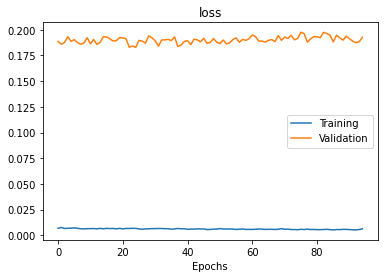

In [222]:
#plot performance
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.legend(["Training","Validation"])
plt.xlabel("Epochs")
plt.show()

In [223]:
#save model
model.save("2401pm_Model.h5")

### testing for bias

In [224]:
data = model.predict(x_test_processed)
data[0]

array([-0.00584175], dtype=float32)

[]

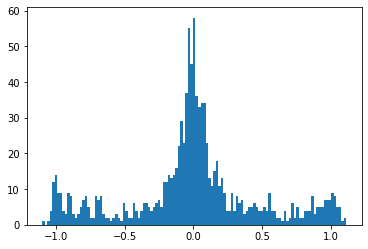

In [225]:
plt.hist(data, bins=121)
plt.plot()

### importing model


In [215]:
test_model = load_model("1130pm_model.h5")

In [216]:
data1 = test_model.predict(x_test_processed)

[]

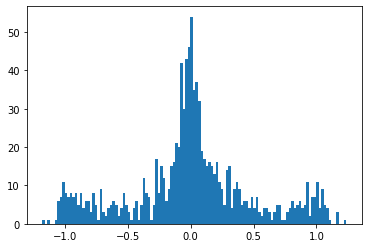

In [217]:
plt.hist(data1, bins=121)
plt.plot()

In [173]:
#fit the model to our data
history = test_model.fit(x_train_processed,y_train,
         epochs=100,
         verbose=1,
         validation_split=0.1,
         steps_per_epoch=200,
         validation_steps=30
         )

Epoch 1/50
200/200 [==============================] - 3s 13ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 2/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 5/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0095 - val_loss: 0.0099
Epoch 6/50
200/200 [==============================] - 2s 11ms/step - loss: 0.0094 - val_loss: 0.0099
Epoch 7/50
200/200 [==============================] - 2s 11ms/step - loss: 0.0094 - val_loss: 0.0099
Epoch 8/50
200/200 [==============================] - 2s 11ms/step - loss: 0.0094 - val_loss: 0.0099
Epoch 9/50
200/200 [==============================] - 2s 11ms/step - loss: 0.0095 - val_loss: 0.0099
Epoch 10/50
200/200 [==============================] - 2s 11ms/step - loss: 0.0093 - val_lo

In [174]:
#save model
model.save("1045pm_Model.h5")